# Q2) Neural Networks from Scratch

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
import numpy as np
from sklearn import datasets
from scipy.special import expit
import warnings
from sklearn import datasets

warnings.filterwarnings('ignore')

class NeuralNetworks:
    def __init__(self,layers,mdata,target,epochs,batchSize,alpha):
        self.layers = layers  #To define all the number of neurons in each layer as a list 
        self.epochs = epochs #Number of Epochs
        self.batchSize = batchSize #BatchSize
        self.alpha = alpha #Learning Rate
        self.parameters = [] #To store the parameters/weights for all layers
        self.activation = [] #To store the activation of each layer
        self.delta = []  #To store the Delat of each layer
        for i in range(len(layers)-1):
            self.parameters.append(np.random.randn(self.layers[i+1],self.layers[i]+1)*0.03) #Initializing the weights 
        self.mnistDataTrain = mdata[:42000]
        self.mnistDataVal = mdata[42000:]
        self.targetTrain = self.oneHot(target[:42000]) #Converting the Train target using oneHot
        self.targetVal = self.oneHot(target[42000:]) #Converting the Validation target using oneHot
        self.accuracyTrain = []
        self.accuracyVal = []

    # Function for Neural Networks Processing
    def neuralNet(self):
        m = self.mnistDataTrain.shape[0]
        for j in range(self.epochs): # Running for total number of EPOCHS
            for i in range(0,m,self.batchSize): #Passing the batchSize of samples
                self.activation.append(np.hstack((np.ones((self.batchSize,1)),self.mnistDataTrain[i:i+self.batchSize]))) #Adding the bias neuron to the 1st activation layer 
                self.forwardPropagation(self.batchSize) #Forward propagation to calculate the acitvation for every layer
                self.delta.append(((self.activation[-1]-self.targetTrain[i:i+self.batchSize])*self.activation[-1]*(1-self.activation[-1]))/self.batchSize) #Calculating the delta for the last layer
                self.backwardPropagation() #Backward propagation for calculating the delta for every layer
                for i in range(len(self.parameters)-1): #Updating every weight parameters
                    self.parameters[i] -= self.alpha * np.dot(self.delta[i].T,self.activation[i])
                self.parameters[i+1] -= self.alpha * np.dot(self.delta[i+1].T,self.activation[i+1])
                self.activation = [] #Cleaning the activation and delta list for next batch 
                self.delta = []
            accTrain, lossTrain = self.calcAccuracy(self.mnistDataTrain,self.targetTrain) #Calculate the accuracy and loss after one 1 epoch on training set
            accVal, lossVal = self.calcAccuracy(self.mnistDataVal,self.targetVal) #Calculate the accuracy and loss after one 1 epoch on validation set
            self.accuracyTrain.append(accTrain)
            self.accuracyVal.append(accVal)
            if (j+1)%10==0:
                print("Epochs {}: \n Train Set \t Loss: {} \t Accuracy = {} \n Validation Set \t Loss: {} \t Accuracy = {}".format(j+1,lossTrain,accTrain,lossVal,accVal))
        
    #Forward Propagation for calculating activation for every layer
    def forwardPropagation(self,lengthMat):
        for i in range(1,len(self.layers)-1):
            self.activation.append(np.hstack((np.ones((lengthMat,1)),self.sigmoid(np.dot(self.activation[i-1],self.parameters[i-1].T))))) #Adding the bias neuron and calculating the activation layer
        self.activation.append(self.sigmoid(np.dot(self.activation[i],self.parameters[i].T)))

    #Sigmoid Function as the activation function
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    #Backward Propagation for calculating the delta for every layer
    def backwardPropagation(self):
        for i in range(len(self.layers)-2,0,-1):
            self.delta.append(np.dot(self.delta[-1],self.parameters[i][:,1:])*self.activation[i][:,1:]*(1-self.activation[i][:,1:]))
        self.delta = self.delta[::-1]
    
    #Calculate the loss and accuracy for test data
    def test(self, testset, tar):
        target = self.oneHot(tar)
        accuracy, loss = self.calcAccuracy(testset,target)
        print("Accuracy: ",accuracy)
    
    #Caculation of accuracy for provided dataset and target 
    def calcAccuracy(self,testset,target):
        self.activation.append(np.hstack((np.ones((len(testset),1)),testset)))
        self.forwardPropagation(len(testset))
        outputs = self.activation[-1]  
        correct = (np.argmax(outputs, axis=1) == np.argmax(target, axis=1)).sum()
        loss = np.sum((outputs - target)**2)/len(testset)
        self.activation = []
        accuracy = correct*100/len(testset)
        return accuracy, loss

    #One-Hot encoding for target
    def oneHot(self,output):
        output = output.astype(np.int64)
        value = np.zeros((output.shape[0],10))
        value[np.arange(output.shape[0]),output] = 1
        return value



In [138]:
#Download the dataset for Digit Recognition 
from sklearn import datasets
mNist = datasets.fetch_openml('mnist_784')

In [141]:
#Creating object of Neural Networks
obj = NeuralNetworks([784,30,10],mNist.data[:51000],mNist.target[:51000],150,1,0.005)
obj.neuralNet()

Epochs 10: 
 Train Set 	 Loss: 0.255785397852194 	 Accuracy = 84.86190476190477 
 Validation Set 	 Loss: 0.2681341853357145 	 Accuracy = 83.95555555555555
Epochs 20: 
 Train Set 	 Loss: 0.22358856087778908 	 Accuracy = 86.25238095238095 
 Validation Set 	 Loss: 0.23965660040382192 	 Accuracy = 85.02222222222223
Epochs 30: 
 Train Set 	 Loss: 0.2291510613007532 	 Accuracy = 86.0 
 Validation Set 	 Loss: 0.24717255740911767 	 Accuracy = 84.6
Epochs 40: 
 Train Set 	 Loss: 0.21317604878932717 	 Accuracy = 86.46428571428571 
 Validation Set 	 Loss: 0.23676881300613184 	 Accuracy = 84.55555555555556
Epochs 50: 
 Train Set 	 Loss: 0.18866611949244183 	 Accuracy = 88.19285714285714 
 Validation Set 	 Loss: 0.2031375404956315 	 Accuracy = 86.82222222222222
Epochs 60: 
 Train Set 	 Loss: 0.1867672790003504 	 Accuracy = 88.17857142857143 
 Validation Set 	 Loss: 0.20366918732171643 	 Accuracy = 87.04444444444445
Epochs 70: 
 Train Set 	 Loss: 0.1753585713423922 	 Accuracy = 89.06904761904762 
 V

### __Accuracy__ __on__ __Test__ __Set__

In [179]:
print("Accuracy of Test Set: \n")
obj.test(mNist.data[51000:],mNist.target[51000:])

Accuracy of Test Set: 

Accuracy:  89.72631578947369


### __Plotting__ __Accuracy__ __vs__ __Number__ __of__ __Epochs__

Text(0.5, 1.0, 'Accuracy Vs Number of Epochs')

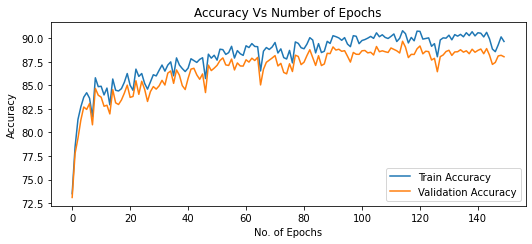

In [153]:
plt.plot(obj.accuracyTrain,label='Train Accuracy')
plt.plot(obj.accuracyVal, label='Validation Accuracy')
plt.legend()
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Number of Epochs")

# Using Pytorch

In [155]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,random_split

# Q3 Comparison with implementation from scratch

In [156]:
#Download the dataset 
traindata = datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
dataValid,dataTest,dataTrain = random_split(traindata, [9000,9000,42000], generator=torch.Generator().manual_seed(42)) #Random Split into Test,Validation and Train
trainLoader = DataLoader(dataTrain, batch_size=1, shuffle=True) #Train Set with batchsize = 1
testLoader = DataLoader(dataTest, batch_size=len(dataTest), shuffle=True) #Test Set
validLoader = DataLoader(dataValid, batch_size=len(dataValid), shuffle=True) #Validation Set
trainloaderFull = DataLoader(dataTrain, batch_size=len(dataTrain), shuffle=True) #Train Set

In [160]:
#Define the model for the neural Networks
model = torch.nn.Sequential(
    nn.Linear(784, 30),
    nn.Sigmoid(),
    nn.Linear(30, 10),
    nn.Sigmoid()
).cuda()
#Defining the MSE Loss function
LOSS = nn.MSELoss().cuda()
#Using SDG as the Optimizer
OPT = torch.optim.SGD(model.parameters(), lr=0.005)
EPOCHS = 30
listAccuracyTrain = [] #To store the accuracy of train set after every epoch
listAccuracyValid = [] #To store the accuracy of validation set after every epoch
for epoch in range(EPOCHS):
    for batch_no, data in enumerate(trainLoader):
        X_batch, y_batch = data
        X_batch = X_batch.cuda()
        y_batch = y_batch.cuda()
        #Forward Propagation
        outputs = model(X_batch.view(-1, 784)) 
        #Calculation of Loss
        loss = LOSS(outputs, F.one_hot(y_batch, num_classes=10).float())
        #Backward Propagation 
        OPT.zero_grad()
        loss.backward()
        OPT.step()
    #Calculate the Accuracy and Loss on trainset
    for batch_no,data in enumerate(trainloaderFull):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsTrain = model(X.view(-1,784))
        lossTrain = LOSS(outputsTrain, F.one_hot(y, num_classes=10).float())
        accuracyTrain = 100 * (torch.argmax(outputsTrain,dim=1) == y).sum() / len(X)
    #Calculate the Accuracy and Loss on Validation 
    for batch_no,data in enumerate(validLoader):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsValid = model(X.view(-1,784))
        lossValid = LOSS(outputsValid, F.one_hot(y, num_classes=10).float())
        accuracyValid = 100 * (torch.argmax(outputsValid,dim=1) == y).sum() / len(X)
    listAccuracyTrain.append(accuracyTrain)
    listAccuracyValid.append(accuracyValid)
    print("Epochs {}: \n Train Set \t Loss: {} \t Accuracy = {} \n Validation Set \t Loss: {} \t Accuracy = {}".format(epoch+1,lossTrain,accuracyTrain,lossValid,accuracyValid))

Epochs 1: 
 Train Set 	 Loss: 0.08803049474954605 	 Accuracy = 32.659523010253906 
 Validation Set 	 Loss: 0.08807530254125595 	 Accuracy = 31.988889694213867
Epochs 2: 
 Train Set 	 Loss: 0.08341872692108154 	 Accuracy = 36.83095169067383 
 Validation Set 	 Loss: 0.08355171233415604 	 Accuracy = 36.155555725097656
Epochs 3: 
 Train Set 	 Loss: 0.07353410869836807 	 Accuracy = 53.44761657714844 
 Validation Set 	 Loss: 0.0737907886505127 	 Accuracy = 52.72222137451172
Epochs 4: 
 Train Set 	 Loss: 0.06288120150566101 	 Accuracy = 63.157142639160156 
 Validation Set 	 Loss: 0.0631667971611023 	 Accuracy = 62.4555549621582
Epochs 5: 
 Train Set 	 Loss: 0.054203420877456665 	 Accuracy = 68.79523468017578 
 Validation Set 	 Loss: 0.05450761690735817 	 Accuracy = 68.34444427490234
Epochs 6: 
 Train Set 	 Loss: 0.047743115574121475 	 Accuracy = 75.16666412353516 
 Validation Set 	 Loss: 0.04805712401866913 	 Accuracy = 74.53333282470703
Epochs 7: 
 Train Set 	 Loss: 0.042795710265636444 	 Ac

### Accuracy on Test Set

In [161]:
for b,data in enumerate(testLoader):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsTest = model(X.view(-1,784))
        lossTest = LOSS(outputsValid, F.one_hot(y, num_classes=10).float())
        accuracyTest = 100 * (torch.argmax(outputsTest,dim=1) == y).sum() / len(X)

In [162]:
print("Accuracy and Loss of Test Set: \n Accuracy: {} \n Loss: {}".format(accuracyTest,lossTest))

Accuracy and Loss of Test Set: 
 Accuracy: 90.71111297607422 
 Loss: 0.14922881126403809


### Plotting Accuracy vs Number of Epochs

In [170]:
listAccuracyTrain = [i.item() for i in listAccuracyTrain]
listAccuracyValid = [i.item() for i in listAccuracyValid]

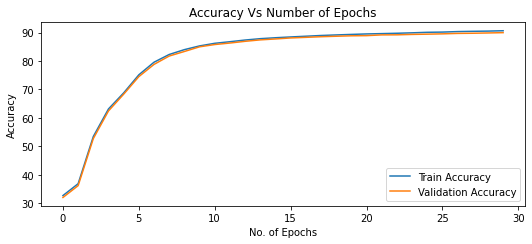

In [172]:
plt.plot(listAccuracyTrain, label='Train Accuracy')
plt.plot(listAccuracyValid, label='Validation Accuracy')
plt.legend()
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Number of Epochs")
plt.show()

### Comparison between Q2 and Q3
- We can see that the accuracy of both the algorithms, one build from scratch and the other using pytrch is almost same

# Q4 Using Training Tips to improve training process

### Changing the Loss Function to CrossEntropy Loss to Improve training process

In [173]:
traindata = datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
dataValid,dataTest,dataTrain = random_split(traindata, [9000,9000,42000], generator=torch.Generator().manual_seed(42))
testLoader = DataLoader(dataTest, batch_size=len(dataTest), shuffle=True)
validLoader = DataLoader(dataValid, batch_size=len(dataValid), shuffle=True)
trainloaderFull = DataLoader(traindata, batch_size=len(dataTrain), shuffle=True)
trainLoader = DataLoader(dataTrain, batch_size=1, shuffle=True)

In [177]:
model = torch.nn.Sequential(
    nn.Linear(784, 30),
    nn.Sigmoid(),
    nn.Linear(30, 10),
    nn.Sigmoid()
).cuda()
LOSS = nn.CrossEntropyLoss().cuda()
OPT = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 30
listAccuracyTrainCross = []
listAccuracyValidCross = []

for epoch in range(EPOCHS):
    for batch_no, data in enumerate(trainLoader):
        X_batch, y_batch = data
        X_batch = X_batch.cuda()
        y_batch = y_batch.cuda()
        #forward
        outputs = model(X_batch.view(-1, 784))
        #loss
        loss = LOSS(outputs, F.one_hot(y_batch, num_classes=10).float())
        #backward
        OPT.zero_grad()
        loss.backward()
        OPT.step()
    for batch_no,data in enumerate(trainloaderFull):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsTrain = model(X.view(-1,784))
        lossTrain = LOSS(outputsTrain, F.one_hot(y, num_classes=10).float())
        accuracyTrain = 100 * (torch.argmax(outputsTrain,dim=1) == y).sum() / len(X)
    for batch_no,data in enumerate(validLoader):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsValid = model(X.view(-1,784))
        lossValid = LOSS(outputsValid, F.one_hot(y, num_classes=10).float())
        accuracyValid = 100 * (torch.argmax(outputsValid,dim=1) == y).sum() / len(X)
    listAccuracyTrainCross.append(accuracyTrain)
    listAccuracyValidCross.append(accuracyValid)
    print("Epochs {}: \n Train Set \t Loss: {} \t Accuracy = {} \n Validation Set \t Loss: {} \t Accuracy = {}".format(epoch+1,lossTrain,accuracyTrain,lossValid,accuracyValid))

Epochs 1: 
 Train Set 	 Loss: 1.6878418922424316 	 Accuracy = 83.77222442626953 
 Validation Set 	 Loss: 1.6908849477767944 	 Accuracy = 83.4888916015625
Epochs 2: 
 Train Set 	 Loss: 1.6242867708206177 	 Accuracy = 87.02222442626953 
 Validation Set 	 Loss: 1.6284023523330688 	 Accuracy = 86.3888931274414
Epochs 3: 
 Train Set 	 Loss: 1.597713589668274 	 Accuracy = 87.63333129882812 
 Validation Set 	 Loss: 1.6016926765441895 	 Accuracy = 87.4111099243164
Epochs 4: 
 Train Set 	 Loss: 1.5814381837844849 	 Accuracy = 88.74444580078125 
 Validation Set 	 Loss: 1.586452603340149 	 Accuracy = 87.93333435058594
Epochs 5: 
 Train Set 	 Loss: 1.5699405670166016 	 Accuracy = 89.93333435058594 
 Validation Set 	 Loss: 1.5768320560455322 	 Accuracy = 89.31111145019531
Epochs 6: 
 Train Set 	 Loss: 1.5658081769943237 	 Accuracy = 90.67778015136719 
 Validation Set 	 Loss: 1.568973422050476 	 Accuracy = 90.5777816772461
Epochs 7: 
 Train Set 	 Loss: 1.5547583103179932 	 Accuracy = 91.738891601562

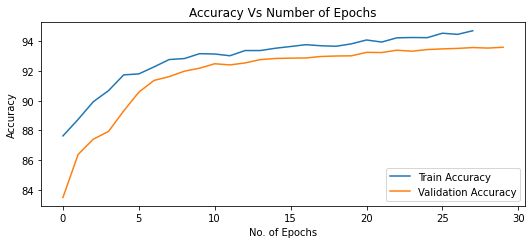

In [201]:
plt.plot(listAccuracyTrainCross, label='Train Accuracy')
plt.plot(listAccuracyValidCross, label='Validation Accuracy')
plt.legend()
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Number of Epochs")
plt.show()

#### Changing the Loss function increases the accuracy on training, Testing and learning speed 

### Changing the learning rate to 0.01 also increases the Accuracy

In [131]:
traindata = datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
dataValid,dataTest,dataTrain = random_split(traindata, [9000,9000,42000], generator=torch.Generator().manual_seed(42))
testLoader = DataLoader(dataTest, batch_size=len(dataTest), shuffle=True)
validLoader = DataLoader(dataValid, batch_size=len(dataValid), shuffle=True)
trainloaderFull = DataLoader(traindata, batch_size=len(dataTrain), shuffle=True)
trainLoader = DataLoader(dataTrain, batch_size=1, shuffle=True)

In [132]:
model = torch.nn.Sequential(
    nn.Linear(784, 30),
    nn.Sigmoid(),
    nn.Linear(30, 10),
    nn.Sigmoid()
).cuda()
LOSS = nn.MSELoss().cuda()
OPT = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 30

for epoch in range(EPOCHS):
    for batch_no, data in enumerate(trainLoader):
        X_batch, y_batch = data
        X_batch = X_batch.cuda()
        y_batch = y_batch.cuda()
        #forward
        outputs = model(X_batch.view(-1, 784))
        #loss
        loss = LOSS(outputs, F.one_hot(y_batch, num_classes=10).float())
        #backward
        OPT.zero_grad()
        loss.backward()
        OPT.step()
    for batch_no,data in enumerate(trainloaderFull):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsTrain = model(X.view(-1,784))
        lossTrain = LOSS(outputsTrain, F.one_hot(y, num_classes=10).float())
        accuracyTrain = 100 * (torch.argmax(outputsTrain,dim=1) == y).sum() / len(X)
    for batch_no,data in enumerate(validLoader):
        X, y = data
        X = X.cuda()
        y = y.cuda()
        outputsValid = model(X.view(-1,784))
        lossValid = LOSS(outputsValid, F.one_hot(y, num_classes=10).float())
        accuracyValid = 100 * (torch.argmax(outputsValid,dim=1) == y).sum() / len(X)
    print("Epochs {}: \n Train Set \t Loss: {} \t Accuracy = {} \n Validation Set \t Loss: {} \t Accuracy = {}".format(epoch+1,lossTrain,accuracyTrain,lossValid,accuracyValid))

Epochs 1: 
 Train Set 	 Loss: 0.08381203562021255 	 Accuracy = 34.25 
 Validation Set 	 Loss: 0.08394546061754227 	 Accuracy = 33.67777633666992
Epochs 2: 
 Train Set 	 Loss: 0.06554482877254486 	 Accuracy = 60.71111297607422 
 Validation Set 	 Loss: 0.0655660405755043 	 Accuracy = 60.78889083862305
Epochs 3: 
 Train Set 	 Loss: 0.049720704555511475 	 Accuracy = 73.28333282470703 
 Validation Set 	 Loss: 0.04993884637951851 	 Accuracy = 72.81111145019531
Epochs 4: 
 Train Set 	 Loss: 0.040387917309999466 	 Accuracy = 79.0777816772461 
 Validation Set 	 Loss: 0.04064389690756798 	 Accuracy = 79.12222290039062
Epochs 5: 
 Train Set 	 Loss: 0.033811263740062714 	 Accuracy = 84.30555725097656 
 Validation Set 	 Loss: 0.03458321839570999 	 Accuracy = 83.5888900756836
Epochs 6: 
 Train Set 	 Loss: 0.029899094253778458 	 Accuracy = 86.52777862548828 
 Validation Set 	 Loss: 0.030291637405753136 	 Accuracy = 86.37777709960938
Epochs 7: 
 Train Set 	 Loss: 0.026472385972738266 	 Accuracy = 88.0